# Image Segementation and the Watershed Algorithm
---
In geography, a watershed is a land area that channeks rainfall and snowmelt to creeks, streams, and rivers, and eventually to outflow points such as reservoirs, bays, and the ocean. These watersheds can then be segmented as topographical maps with boundaries.

The watershed algorithm transformation treats the image it operates upon like a topographic map, with the brightness of each point representing its height, and finds the lines that run along the tops of ridges.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img, cmap='gray'):
    fix = plt.figure(figsize=(12,10))
    ax = fix.add_subplot(111)
    ax.imshow(img, cmap)

## Our Task: Draw Contours Around the Coins

## Common Coin Example
## Naive Approach

Let's try to simply use a threshold and then use findContours.

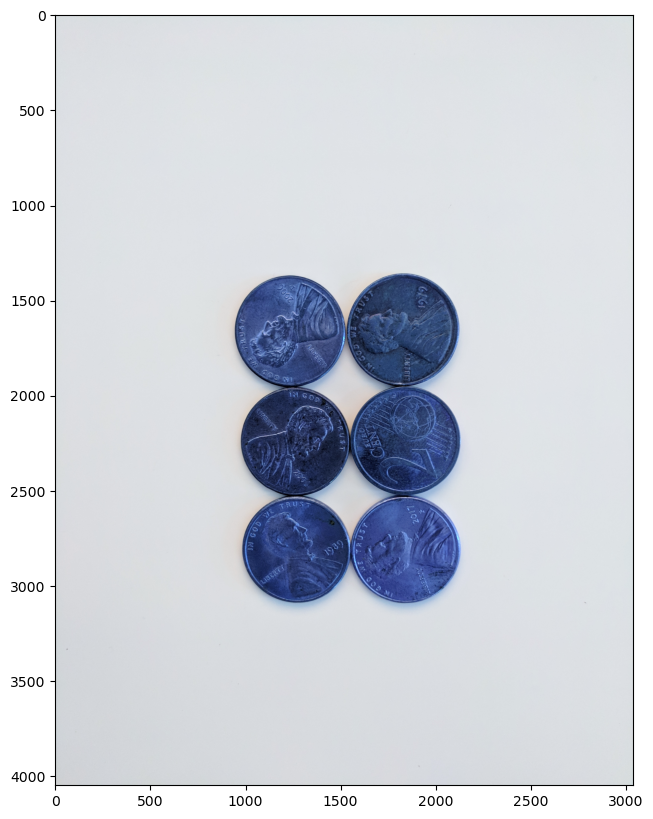

In [3]:
sep_coins = cv2.imread('../DATA/pennies.jpg')
display(sep_coins)

### Apply Median Blurring

We have too much detail in this image, including light, the face edges on the coins, and too much detail in the background. Let's use Median Blur Filtering to blur the image a bit, which will be useful later on when we threshold.

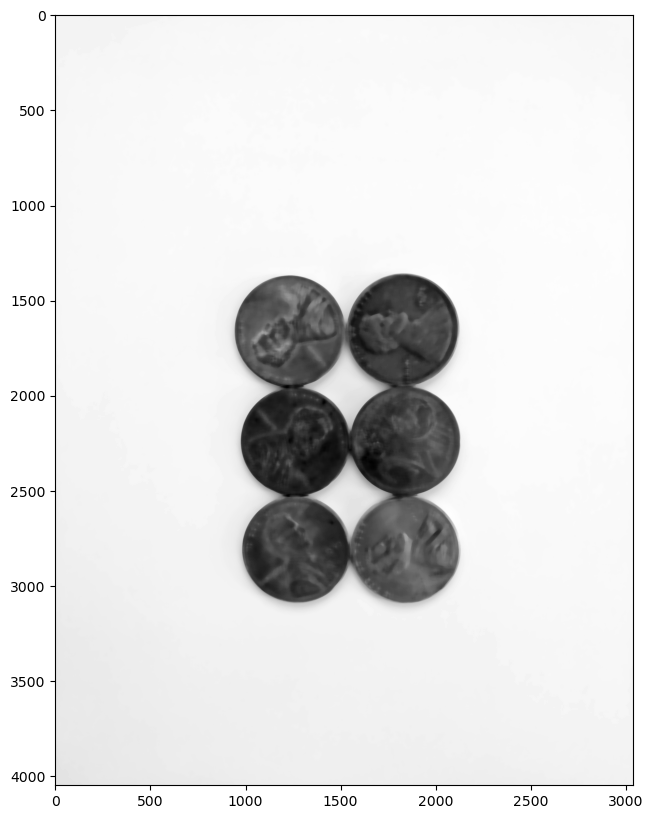

In [6]:
# Median Blur
sep_blur = cv2.medianBlur(sep_coins,25)

# Grayscale
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

display(gray_sep_coins)

### FindContours

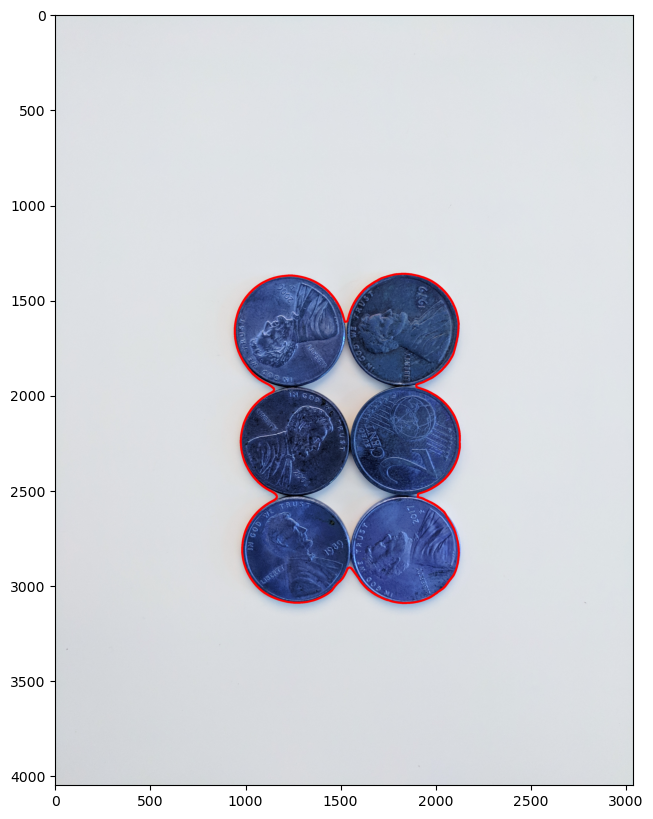

In [8]:
# Binary Threshold
ret, th = cv2.threshold(gray_sep_coins,160,255, cv2.THRESH_BINARY_INV)

# Find Contours
contours, hierarchy = cv2.findContours(th.copy(),cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours,i,(255,0,0), 10)

display(sep_coins)

# Watershed Algorithm
---
Let's now try the watershed algorithm apporach to draw contours around the pennies.

#### Step 1: Read Image

In [9]:
img = cv2.imread('../DATA/pennies.jpg')

#### Step 2: Apply Blur

In [10]:
img_blur = cv2.medianBlur(img, ksize=35)

#### Step 3: Convert to Grayscale

In [11]:
gray = cv2.cvtColor(img_blur,cv2.COLOR_BGR2GRAY)

#### Step 4: Apply Threshold (Inverse Binary with OTSU as well)

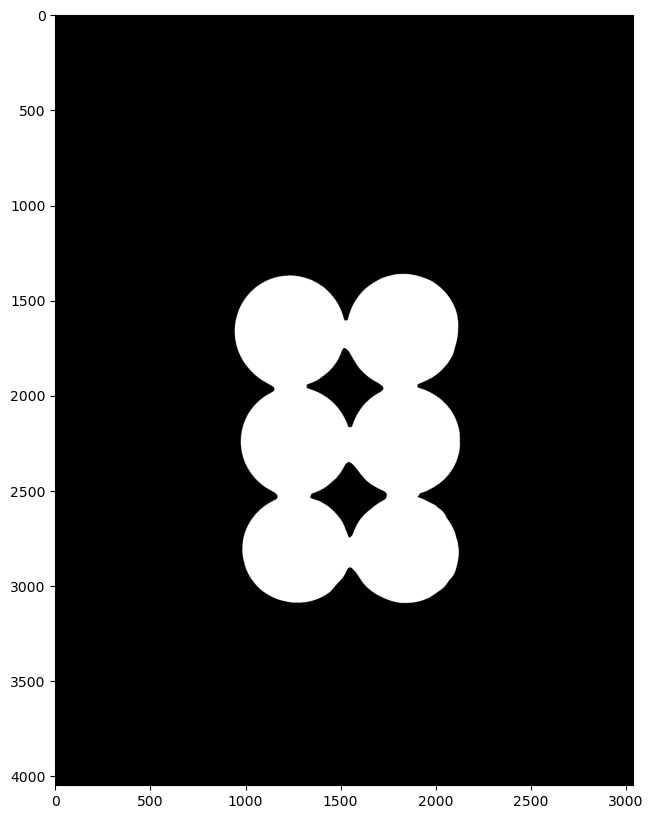

In [13]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh)

### Optional Step 5: Noise Removal

In [14]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel, iterations=2)

#### Step 6: Grab Background that you are sure of

In [15]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

#### Step 7: Find Sure Foreground
---
Apply the distance transform https://homepages.inf.ed.ac.uk/rbf/HIPR2/distance.htm

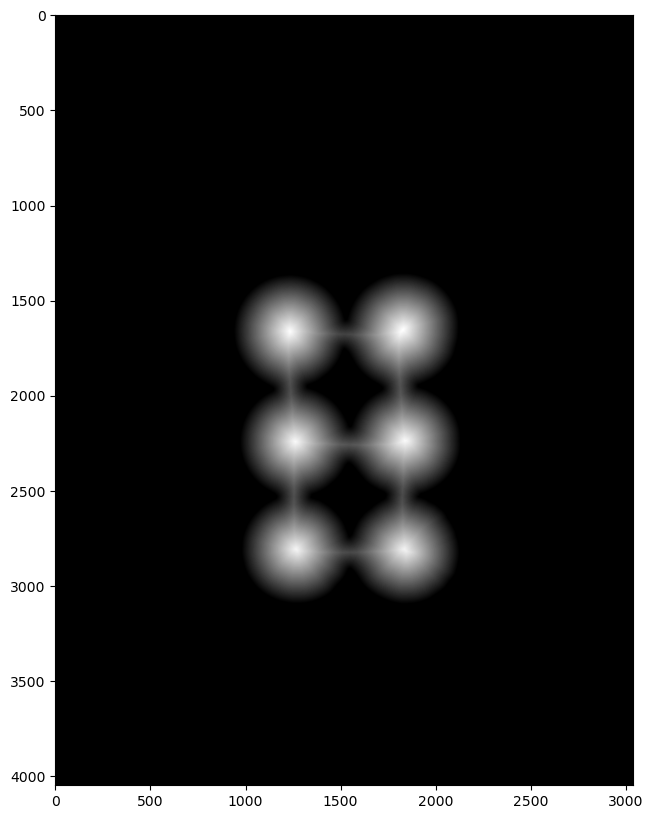

In [16]:
dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2,5)
display(dist_transform)

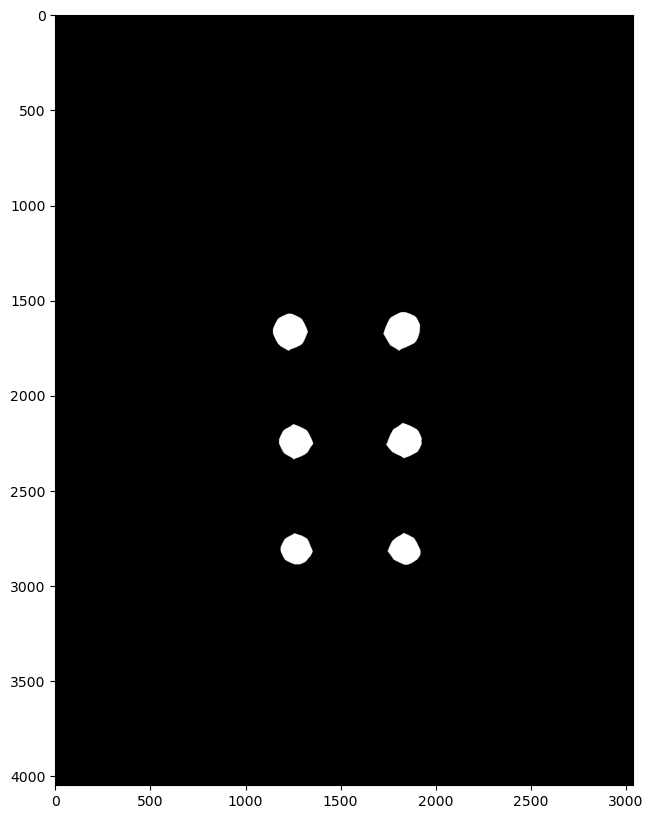

In [18]:
ret, sure_fg = cv2.threshold(dist_transform,.7*dist_transform.max(),255,0)
display(sure_fg)

#### Step 8: Find Unknown Region

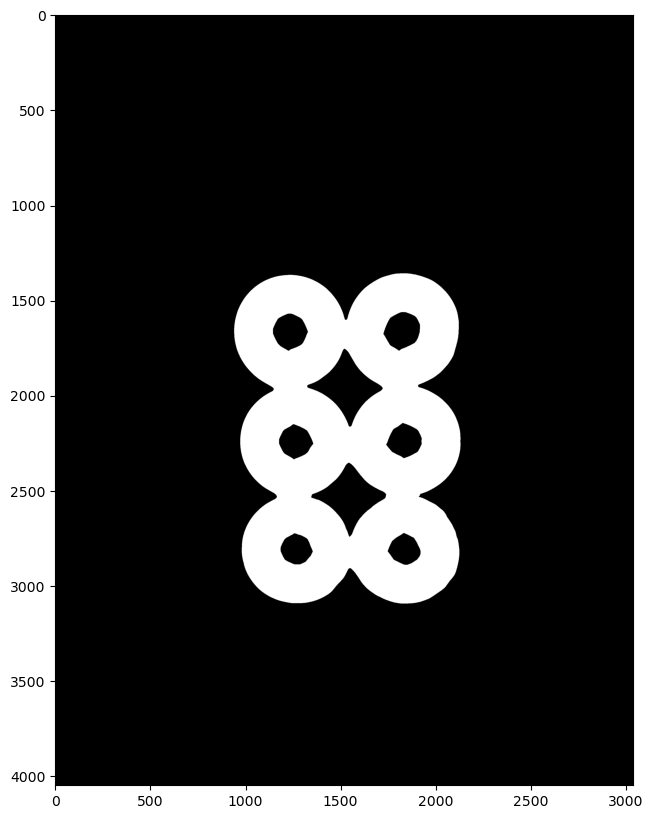

In [19]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
display(unknown)

#### Step 9: Label Markers of Sure Foreground

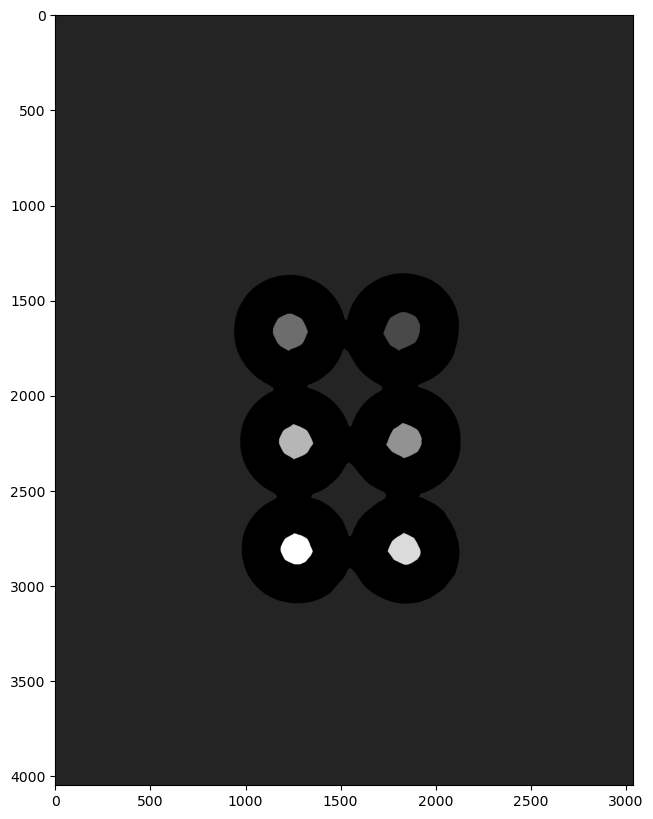

In [20]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown == 255] = 0

display(markers)

#### Step 10: Apply Watershed Algorithm to find Markers

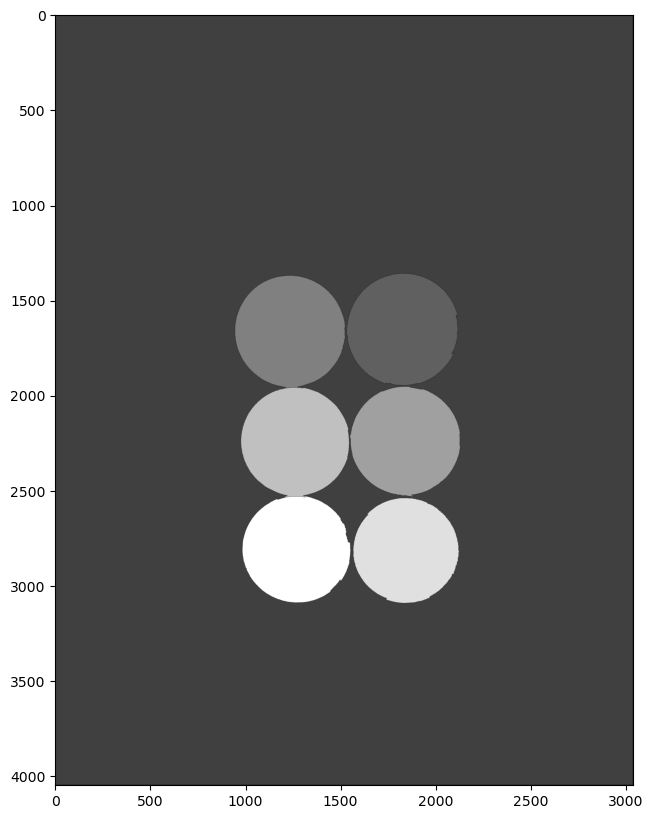

In [21]:
markers = cv2.watershed(img, markers)
display(markers)

#### Step 11: Find Contours on Markers

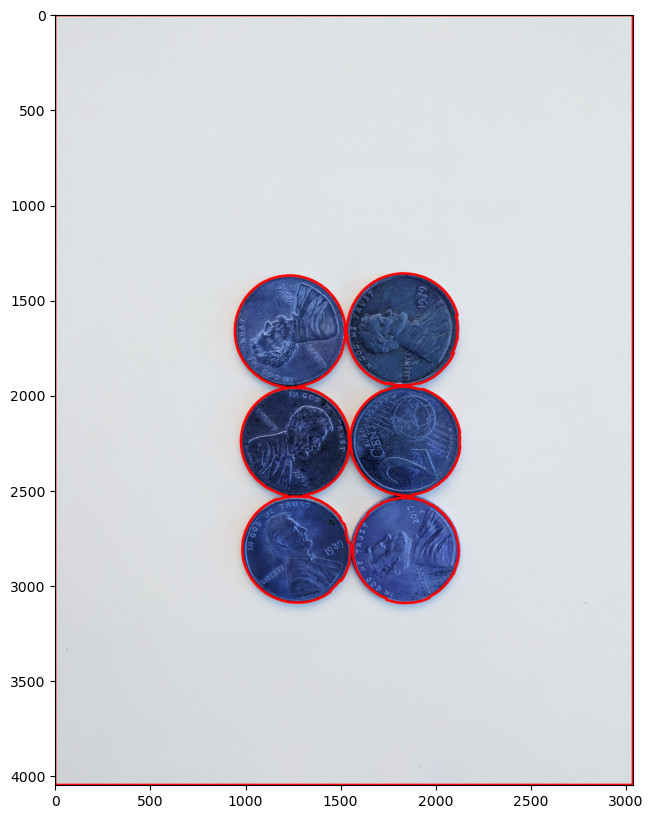

In [22]:
contours, hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours, i, (255,0,0), 10)
        
display(img)